In [1]:
# Created by: Michael Cullen
# 19/11/2024
# https://zenodo.org/records/10457828
# https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# made by chatgpt to install csv as file is to big to commit to github

import kagglehub
import shutil
import os

# Define the current working directory
current_directory = os.getcwd()

# Check if the CSV file already exists in the current directory
csv_exists = any(file.endswith(".csv") for file in os.listdir(current_directory))

if not csv_exists:
    # Download the dataset using kagglehub
    default_path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")

    # Move all downloaded CSV files to the current directory
    for file_name in os.listdir(default_path):
        if file_name.endswith(".csv"):
            shutil.move(os.path.join(default_path, file_name), os.path.join(current_directory, file_name))

    # Delete the downloaded folder after moving the files
    shutil.rmtree(default_path)

    print("Dataset files moved to:", current_directory)
    print(f"Deleted temporary folder: {default_path}")
else:
    print("CSV file already exists in the current directory.")


CSV file already exists in the current directory.


In [4]:
df = pd.read_csv('car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
print("Amount of columns: ", df.shape[0])

Amount of columns:  558837


In [6]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
# Drop not needed columns
df = df.drop(columns=['trim','vin','state','interior','seller','saledate'], errors='ignore')

# Remove rows with missing data
df = df.dropna()


df.head(20)


,year,make,model,body,transmission,condition,odometer,color,mmr,sellingprice
0,2015,Kia,Sorento,SUV,automatic,5.0,16639.0,white,20500.0,21500.0
1,2015,Kia,Sorento,SUV,automatic,5.0,9393.0,white,20800.0,21500.0
2,2014,BMW,3 Series,Sedan,automatic,45.0,1331.0,gray,31900.0,30000.0
3,2015,Volvo,S60,Sedan,automatic,41.0,14282.0,white,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,43.0,2641.0,gray,66000.0,67000.0
5,2015,Nissan,Altima,Sedan,automatic,1.0,5554.0,gray,15350.0,10900.0
6,2014,BMW,M5,Sedan,automatic,34.0,14943.0,black,69000.0,65000.0
7,2014,Chevrolet,Cruze,Sedan,automatic,2.0,28617.0,black,11900.0,9800.0
8,2014,Audi,A4,Sedan,automatic,42.0,9557.0,white,32100.0,32250.0
9,2014,Chevrolet,Camaro,Convertible,automatic,3.0,4809.0,red,26300.0,17500.0


In [8]:
print(df.isnull().sum())
print("Amount of columns: ", df.shape[0])

year            0
make            0
model           0
body            0
transmission    0
condition       0
odometer        0
color           0
mmr             0
sellingprice    0
dtype: int64
Amount of columns:  472325


In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert odometer, year, and mmr to numeric
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['mmr'] = pd.to_numeric(df['mmr'], errors='coerce')

# Define the function to categorise odometer values
def categorise_odometer(odometer):  # 1 = 0-20k, 2 = 20-50k, 3 = 50-100k, 4 = 100-150k, 5 = 150-200k, 6 = 200k+
    if odometer <= 20000:
        return 1  # 0-20k
    elif odometer <= 50000:
        return 2  # 20-50k
    elif odometer <= 100000:
        return 3  # 50-100k
    elif odometer <= 150000:
        return 4  # 100-150k
    elif odometer <= 200000:
        return 5  # 150-200k
    else:
        return 6  # 200k+

# Define function to categorise year
def categorise_year(year):  # 1 = very old, 2 = old, 3 = modern, 4 = new
    if year < 1990:
        return 1  # Very old
    elif year < 2005:
        return 2  # Old
    elif year < 2015:
        return 3  # Modern
    else:
        return 4  # New

# Define function to categorise price
def categorise_price(price):  # 1 = low, 2 = medium, 3 = high, 4 = premium
    if price < 5000:
        return 1  # Low
    elif price < 20000:
        return 2  # Medium
    elif price < 40000:
        return 3  # High
    else:
        return 4  # Premium
    
# Define function to categorise mmr
def categorise_mmr(mmr):  # 1 = very low, 2 = low, 3 = medium, 4 = high, 5 = very high
    if mmr < 5000:
        return 1  # Very Low
    elif mmr < 15000:
        return 2  # Low
    elif mmr < 30000:
        return 3  # Medium
    elif mmr < 50000:
        return 4  # High
    else:
        return 5  # Very High


# Apply categorisation functions
df['odometer_group'] = df['odometer'].apply(categorise_odometer)
df['year_group'] = df['year'].apply(categorise_year)
df['price_group'] = df['sellingprice'].apply(categorise_price)
df['mmr_group'] = df['mmr'].apply(categorise_mmr)

# Group rare colors into 'Other' to reduce noise
if 'color' in df.columns:
    color_counts = df['color'].value_counts()
    rare_colors = color_counts[color_counts < 50].index  # Adjust threshold as needed
    df['color'] = df['color'].replace(rare_colors, 'Other')

# Handle categorical features using LabelEncoder
categorical_columns = ['make', 'model', 'body', 'cylinders', 'drive', 'condition', 'fuel', 'transmission', 'color']

# Encode all categorical columns
for col in categorical_columns:
    if col in df.columns:  # Ensure the column exists in the dataset
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Drop the original columns
df = df.drop(columns=['odometer', 'year', 'sellingprice', 'mmr'], errors='ignore')

# Show the first 10 rows of the processed DataFrame
df.head(10)


,make,model,body,transmission,condition,color,odometer_group,year_group,price_group,mmr_group
0,24,637,35,0,40,16,1,4,3,3
1,24,637,35,0,40,16,1,4,3,3
2,3,8,36,0,35,8,1,3,3,4
3,51,575,36,0,31,16,1,4,3,3
4,3,33,36,0,33,8,1,3,4,5
5,36,63,36,0,0,8,1,4,2,3
6,3,406,36,0,24,2,1,3,4,5
7,7,186,36,0,10,2,2,3,2,2
8,2,46,36,0,32,16,1,3,3,4
9,7,135,9,0,20,13,1,3,2,3


In [10]:
# Define features (X) and target (y)
X = df.drop(columns='price_group')
y = df['price_group']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
#https://www.kaggle.com/code/syedanwarafridi/eda-visualizaton-random-forest-on-vehicle-data/notebook#Feature-Engineering
# code to find out best parameters sourced from kaggle forum

# Random Forest hyperparameter tuning using GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [30, 40, 50],
    'min_samples_split': [8, 12],
    'min_samples_leaf': [4, 5]
}

# Instantiate the model using the best parameters
rf_model = RandomForestRegressor(random_state=42)
rf_best = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model to the training data
rf_best.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
# Make predictions
y_pred = rf_best.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.08
R-squared: 0.82


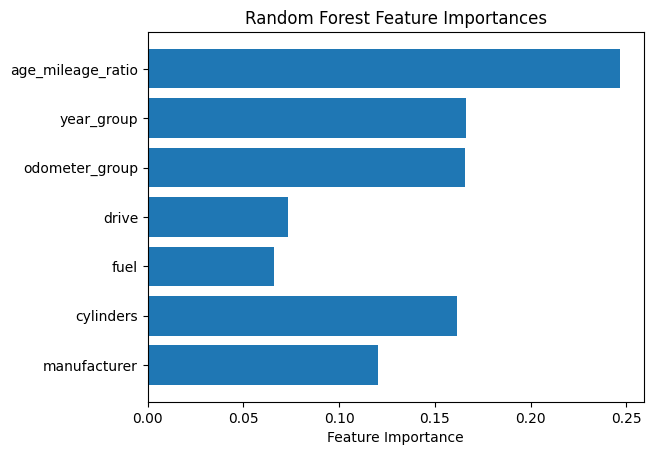

In [ ]:
importances = rf_best.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

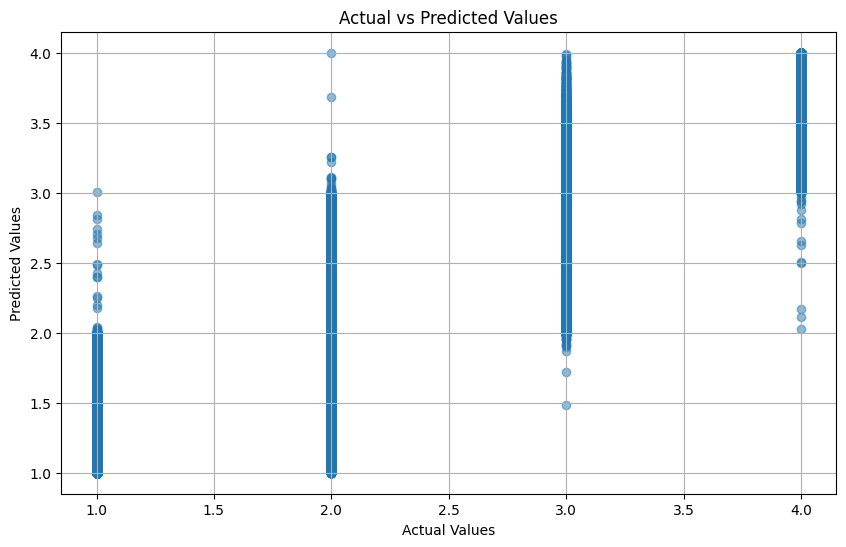

In [ ]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()